In [1]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import accuracy_score


In [2]:
import numpy as np
import pandas as pd

A)In this question, we work with a simplified version of Heart dataset. Read the dataset file “Heart_short.csv” from github, and assign it to a Pandas DataFrame:

In [3]:
heart_df  = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")

In [4]:
heart_df.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No


B)Generate the feature matrix and label vector (AHD). Then, normalize (scale) the features.

In [5]:
feature_cols=['Age','RestBP','Chol','RestECG','MaxHR','Oldpeak']

In [6]:
X=heart_df[feature_cols]
y=heart_df['AHD']


In [7]:
print(X)


     Age  RestBP  Chol  RestECG  MaxHR  Oldpeak
0     63     145   233        2    150      2.3
1     67     160   286        2    108      1.5
2     67     120   229        2    129      2.6
3     37     130   250        0    187      3.5
4     41     130   204        2    172      1.4
..   ...     ...   ...      ...    ...      ...
276   45     110   264        0    132      1.2
277   68     144   193        0    141      3.4
278   57     130   131        0    115      1.2
279   57     130   236        2    174      0.0
280   38     138   175        0    173      0.0

[281 rows x 6 columns]


In [8]:
print(y)


0       No
1      Yes
2      Yes
3       No
4       No
      ... 
276    Yes
277    Yes
278    Yes
279    Yes
280     No
Name: AHD, Length: 281, dtype: object


In [9]:
print(X.shape)
print(y.shape)

(281, 6)
(281,)


In [10]:
Normalise_dt = preprocessing.scale(X)
print(Normalise_dt)

[[ 0.94788279  0.74978425 -0.25859799  1.04743633 -0.00919313  1.13182982]
 [ 1.38542704  1.59842565  0.75330422  1.04743633 -1.84813139  0.43550978]
 [ 1.38542704 -0.6646181  -0.33496796  1.04743633 -0.92866226  1.39294984]
 ...
 [ 0.29156641 -0.09885716 -2.20603242 -0.96851989 -1.54164168  0.17438976]
 [ 0.29156641 -0.09885716 -0.2013205   1.04743633  1.04162873 -0.8700903 ]
 [-1.78676878  0.35375159 -1.36596267 -0.96851989  0.99784448 -0.8700903 ]]


C)Split the dataset into testing and training sets with the following parameters: test_size=0.25, random_state=3.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Normalise_dt,y,test_size=0.25,random_state=3)


In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(210, 6)
(210,)
(71, 6)
(71,)


D)Use Logistic Regression Classifier to predict Heart Disease occurrence based on the training/testing datasets that you built in part(c). Then, compute and report the Accuracy.

In [13]:
from sklearn.linear_model import LogisticRegression
my_log_reg = LogisticRegression()
my_log_reg.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_predict_logreg = my_log_reg.predict(X_test)
score_logreg = accuracy_score(y_test, y_predict_logreg)
y_predict_prob_logreg = my_log_reg.predict_proba(X_test)

In [15]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_logreg[ :,1], pos_label = "Yes")

print(fpr)
print(tpr)

[0.         0.         0.02439024 0.02439024 0.04878049 0.04878049
 0.09756098 0.09756098 0.12195122 0.12195122 0.14634146 0.14634146
 0.2195122  0.2195122  0.29268293 0.29268293 0.3902439  0.3902439
 0.41463415 0.41463415 0.46341463 0.46341463 0.56097561 0.56097561
 0.68292683 0.68292683 0.70731707 0.70731707 0.73170732 0.73170732
 1.        ]
[0.         0.03333333 0.03333333 0.33333333 0.33333333 0.36666667
 0.36666667 0.4        0.4        0.53333333 0.53333333 0.6
 0.6        0.63333333 0.63333333 0.7        0.7        0.73333333
 0.73333333 0.76666667 0.76666667 0.83333333 0.83333333 0.86666667
 0.86666667 0.93333333 0.93333333 0.96666667 0.96666667 1.
 1.        ]


In [16]:
Accuracy = metrics.auc(fpr,tpr)
print(Accuracy)


0.7650406504065042


Now, Use Logistic Regression Classifier to predict the probability of Heart Disease based on the training/testing datasets that you built in part (c) (you have to use “my_logreg.predict_proba” method rather than “my_logreg.predict”). Then, Plot the Roc Curve for this classifier, and also Compute the AUC (Area Under Curve for ROC).

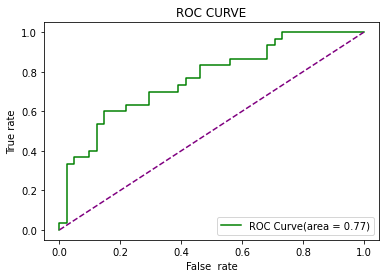

In [17]:
import matplotlib.pyplot as plot
get_ipython().run_line_magic('matplotlib', 'inline')

plot.figure()

plot.plot(fpr,tpr,color='green', label = "ROC Curve(area = %0.2f)" %Accuracy)

plot.plot([0,1], [0,1], color = 'purple', linestyle='--')



plot.xlabel("False  rate")
plot.ylabel("True rate")
plot.title("ROC CURVE")
plot.legend(loc="lower right")

plot.show()
